# ECE 47300 Assignment 3 Exercises



Name:

# Exercise 0 (Important submission information)

1. Follow the instructions in the provided "uploader.ipynb" to convert your ipynb file into PDF format.
2. Please make sure to select the corresponding pages for each exercise when you submitting your PDF to Gradescope. Make sure to include both the **output** and the **code** when selecting pages. (You do not need to include the instruction for the exercises)


**We may assess a 20% penalty for those who do not correctly follow these steps.**

## Exercise 1 (20/100 points)

In this exercise, you will implement linear regression using the polynomial features and compare results for different choices of degrees for the polynomial visually.

### Task 1: Generate the data
The data should be a noisy version of a sin wave i.e
$y = \sin (x) + \epsilon $  where $\epsilon \sim \text{NormalDistribution}(\mu,\sigma)$.  Note $\epsilon$ should be different for every point. Whenever generating a random sample from here on out, please use the `rng` instance in the code for fixing the seed. e.g., ``rng.randn(arg)``.

1. Generate **50** evenly spaced numbers over the interval $[0,4\pi]$ and store them as a vector called `X`.
2. Generate `y` from `X` by using the equation above with the parameter $\mu=0, \sigma=0.1$
3. Do a scatter plot on `X` and `y` and give the plot and axis reasonable names/title.

(You may want to look over the code in section 2 in the instruction notebook under "Simple Linear Regression".)

(50,)


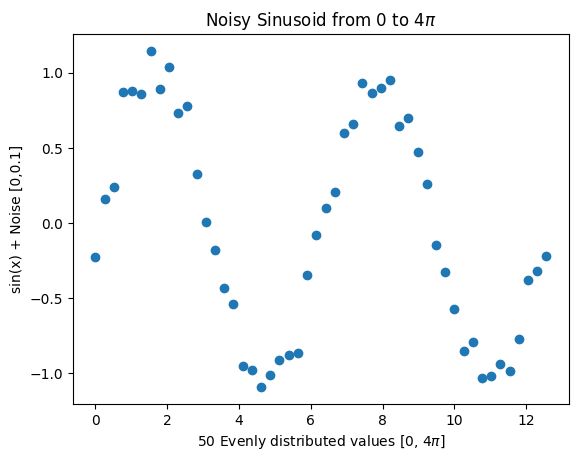

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rng = np.random.RandomState(5) # use this if you need to generate a random sample

####################         YOUR CODE         ####################
num_samples = 50
X = np.linspace(0, (4 * np.pi), num_samples)
sigma = 0.1
y = np.sin(X) + sigma*np.random.randn(num_samples)

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.set_xlabel("50 Evenly distributed values [0, 4$\pi$]")
ax.set_ylabel("sin(x) + Noise [0,0.1]")
ax.set_title("Noisy Sinusoid from 0 to 4$\pi$")
####################         END CODE          ####################

plt.show()

### Task 2: Fit the data
Now try to use tools in sklearn to fit the data with varying degrees of the polynomial. The general process is:
1. Create an estimator based on pipelining the function **PolynomialFeatures(degree)** and **LinearRegression()** (Read the instruction)
2. Fit the estimator to the data you created in Task 1. (Note the estimator will expect a 2D array so you may have to reshape `X`.)
3. Evaluate your trained estimator by using the given vector **xfit**, and plot the result curve over the scatter plot of your data.
(The plot should look similar to the plot on the part 1 of the instruction)

The output of your code should be a 2 by 2 grid of subplots (see [`plt.subplots`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplots.html) or [`plt.subplot`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot)) where each plot visualizes the mdoel fitted using different polynomial degrees (see above), specifically degrees `[3, 5, 9, 15]` respectively.
Each subplot should be given a reasonable title to identify what it represents.

NOTE: It is perfectly normal if the graph looks crazy for high degrees of polynomial choice.

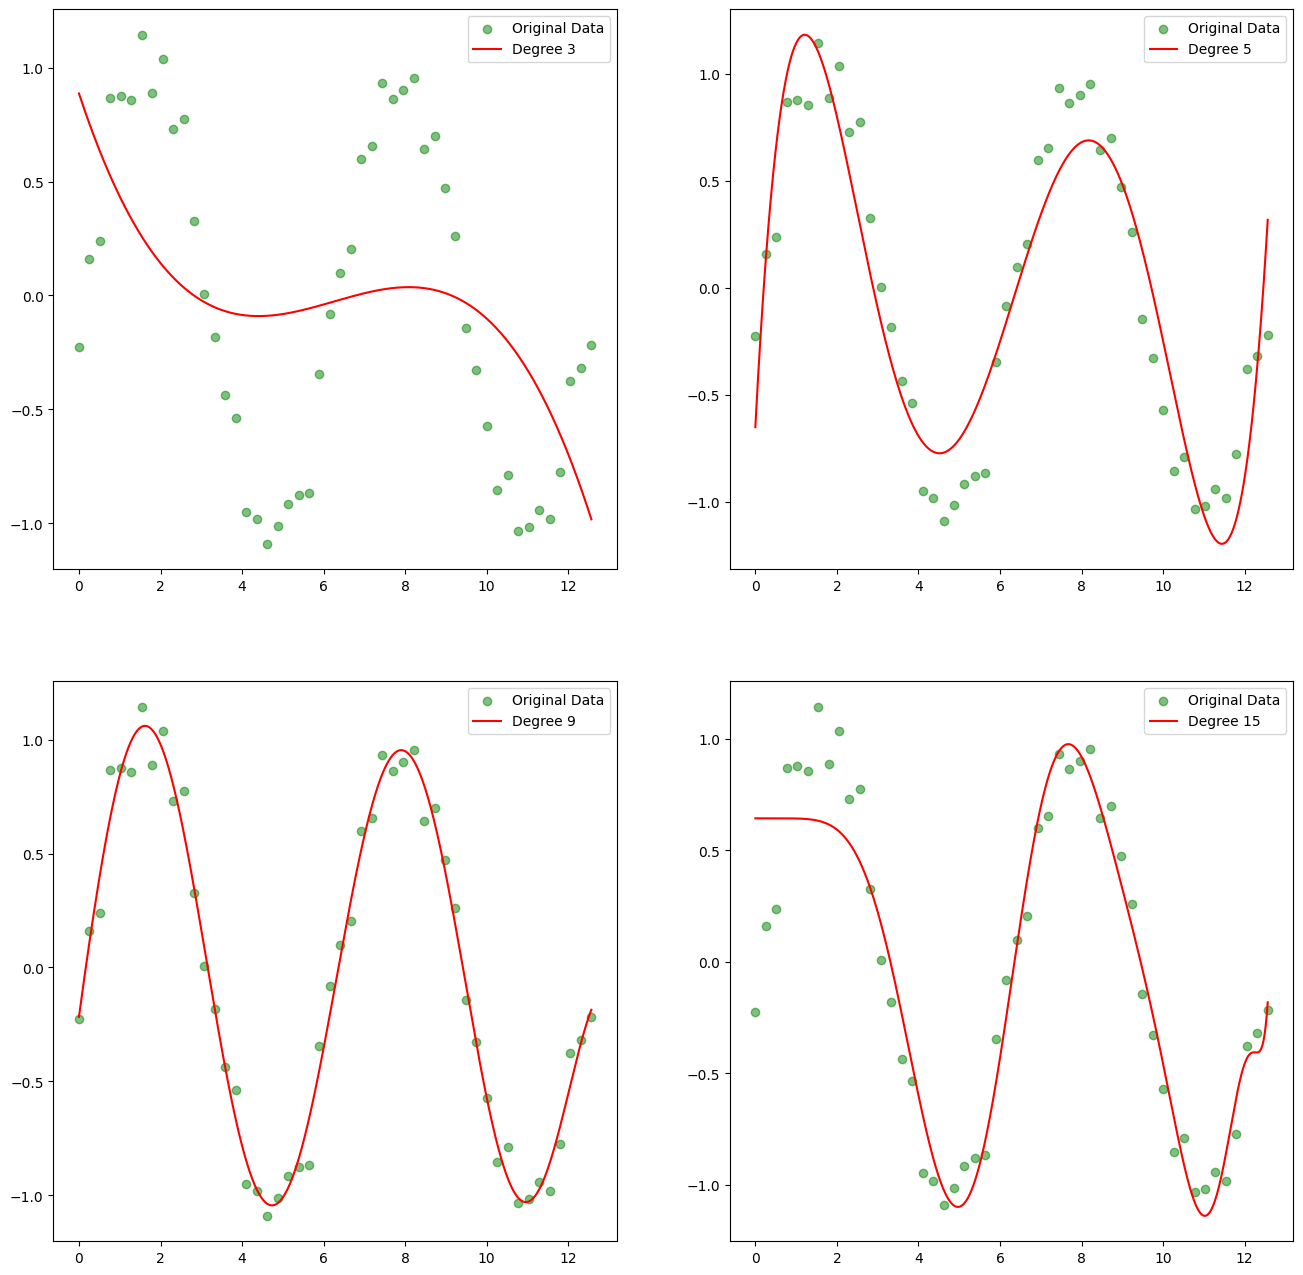

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

xfit = np.linspace(0, 4*np.pi, 1000)
rng = np.random.RandomState(5) # use this if you need to generate a random sample

####################         YOUR CODE         ####################
degrees = [3, 5, 9, 15]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16)) 
axes = axes.ravel()
for i, degree in enumerate(degrees):
    estimator = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    estimator.fit(X.reshape(-1, 1), y)
    yfit = estimator.predict(xfit[:, np.newaxis])

    ax = axes[i]
    ax.scatter(X, y, color='green', alpha=0.5, label='Original Data') # plot original data 
    ax.plot(xfit, yfit, color='red', label=f'Degree {degree}') # plot fitted curve
    ax.legend()
####################         END CODE          ####################
plt.show()

## Exercise 2: Visualizing KNN classifier on IRIS dataset (30/100 points)
In this exercise, you will use KNN classifier to do simple classification on [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

### Task 1: Load the Iris dataset
Iris dataset can be simply loaded by calling the function [`datasets.load_iris()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).
Use the official documentation for this function to create variables that stores the following information:
1.  `X`: stores the last two features ('petal length', 'petal width').
2.  `y`: stores all labels.
3.  `feature_names`: the meaning for the last two features.
4.  `target_names`: the meaning for each label.

(You will have to remove some features from the original dataset to get only 2.)

In [3]:
from sklearn import datasets
rng = np.random.RandomState(5) # use this if you need to generate a random sample

####################         YOUR CODE         ####################







####################         END CODE          ####################

print(f'X has the shape {X.shape}')
print(f'y has the shape {y.shape}')
print(f'X has features: {feature_names}')
print(f'y has labels: {target_names}')

X has the shape (50,)
y has the shape (50,)


NameError: name 'feature_names' is not defined

### Task 2: Train and visualize KNN classfier
1. Setup and train the KNN classifier with K=15. (See instructions)
2. See examples [here](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) and use `plot_decision_regions()` to visualize the decision boundary for trained classifier. Be sure to name the axis with corresponding name of the feature.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

rng = np.random.RandomState(5) # use this if you need to generate a random sample

####################         YOUR CODE         ####################







####################         END CODE          ####################

## Exercise 3: KNN classifier on credit fraud dataset (50/100 points)
In this exercise, you will use K-nearest-neighbor method to create a model that is able to detect potential credit card fraud.

### Task 1: Mount your drive
Follow the step on the instructions and mount your google drive on Colab which allows to access the .csv file uploaded on your drive that was included with this assignment.

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

### Task 2: Load and preprocess datasets
In this program we are using a dataset that has the following features:  

V1 | V1 | ... | V10 | Amount | Class
---|---|---|---|---|---
(float)|(float)|(float)|(float)|(float)|(str)

The first ten features are the top PCA values for certain transaction information. The reason only PCA values are given is to protect private information.
The **Amount** feature is the amount of money in that particular transaction and the **Class** feature contains two classes **safe** and **Fraud**.
Each class has 400 examples, your task is to predict the **Class** feature from all the other features, i.e. determine which transactions are fraudulent or not.

1. Load the given .csv file to the variable `data`.
2. Create `X` from `data` simply by dropping the last column (which will be our `y`) of the pandas dataframe, and create `y` by selecting the last column of the pandas data frame.
3. Use `train_test_split` to create the training and test set (`X_train`, `X_test`, `y_train`, `y_test`) with 20% of the data be the test data and set the `random_state` to `0`.
4. Learn the appropriate transform functions for input and output from the training dataset and then apply to both the train and test set (`X_train`, `X_test`, `y_train`, `y_test`).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

rng = np.random.RandomState(5) # use this if you need to generate a random sample

####################         YOUR CODE         ####################







####################         END CODE          ####################

print(f'X_train has the shape {X_train.shape}')
print(f'y_train has the shape {y_train.shape}')
print(f'X_test has the shape {X_test.shape}')
print(f'y_test has the shape {y_test.shape}')
print(f'X_train mean is {np.mean(X_train, axis=0)}')
print(f'X_test mean is {np.mean(X_test, axis=0)}')
print(f'Sum of X_train mean is {np.sum(np.mean(X_train, axis=0))}')
print(f'Sum of X_test mean is {np.sum(np.mean(X_test, axis=0))}')

### Task 3: Find the optimal KNN estimator
We need to find the optimal parameters of the KNN estimator (the model selection problem) using cross validation, and then provide a final estimate of the model's generalization performance via the test set.
1. Do a grid search (using the `GridSearchCV` estimator from scikit-learn) to optimize the following hyperparameters for KNN (use estimator `KNeighborsClassifier`) and name your gridsearch object `KNN_GV`:
  * The number of neighbors `n_neighbors`
  * Type of weights considered `weights` (at least two options)
  * Type of distance considered `metric` (at least two options)
See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for possible options for those hyperparameters.
2. Fit your gridsearch by specifying the number of folds to 5. (Note: Pass only your training dataset into the `fit` function so that the model selection process doesn't see your test dataset.  `GridSearchCV` will take care of doing cross validation on the training dataset.)
3. Print your best parameters combo (`best_params_`) attribute of KN and the corresponding score on the train and test set.

(Your final model should have a training accuracy of at least 95% and a test accuracy 90% to get full credit.)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

rng = np.random.RandomState(5) # use this if you need to generate a random sample

####################         YOUR CODE         ####################






####################         END CODE          ####################

print(f'The best parameters are {KNN_GV.best_params_}')
print(f'The best accuracy on the training data is {KNN_GV.score(X_train, y_train)}')
print(f'The best accuracy on the testing data is {KNN_GV.score(X_test, y_test)}')

### Just for fun: Try out different classifiers in scikit-learn to see if you can beat the test set performance of KNN on this dataset
(Please do not include this optional activity in your submission to simplify grading.)

Prof. Inouye was able to achieve 96% training and 94% testing accuracy using a combination of methods.  Can you do better?

There are many other classifiers in scikit-learn.  A really cool example of many standard classifiers can be seen in the following image from the scikit-learn example on comparing classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png" />


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rng = np.random.RandomState(5) # use this if you need to generate a random sample

####################         YOUR CODE         ####################



####################         END CODE          ####################

print(est.score(X_train, y_train))
print(est.score(X_test, y_test))